<a href="https://colab.research.google.com/github/Sindhura-tr/Deep-Learning-5-7pm/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

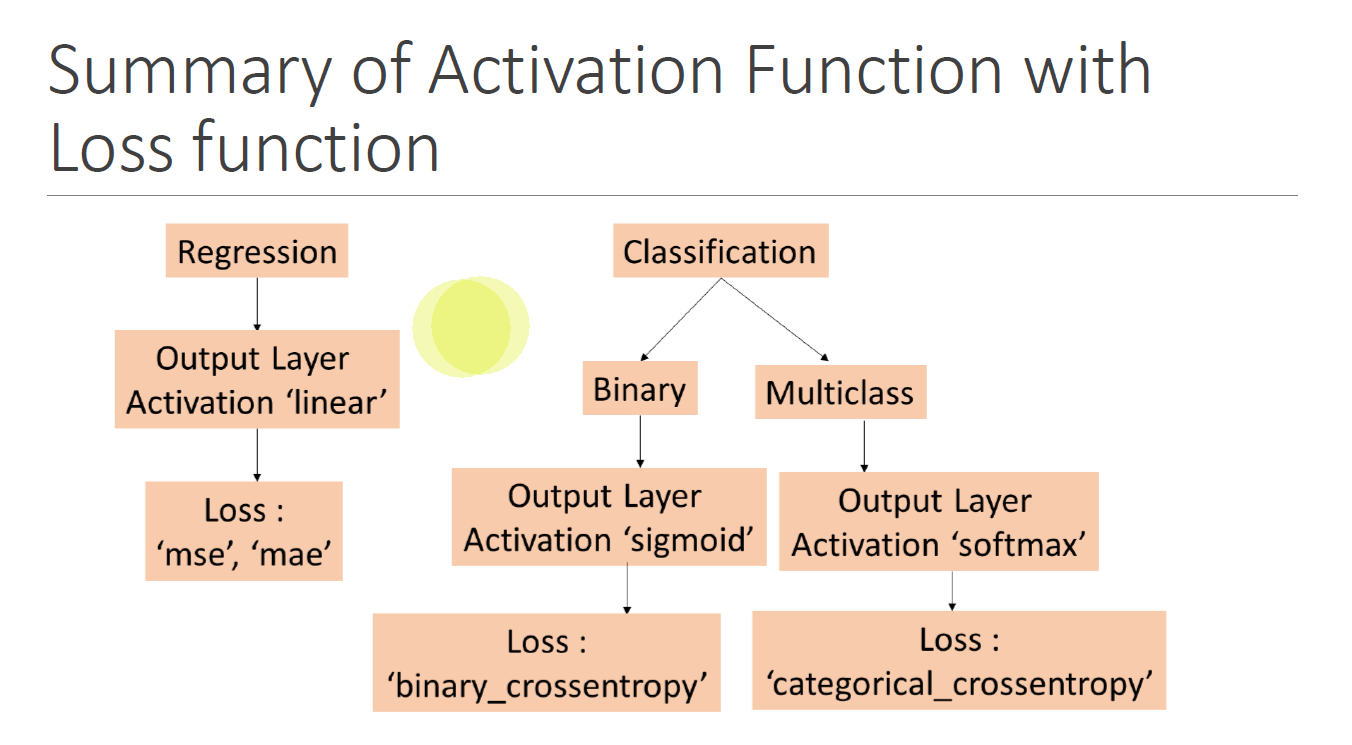

## Binary classification

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/booking_train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


## Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [3]:
df.shape

(42100, 19)

In [4]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [5]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated rows in this dataset

## Separate X and Y features

In [6]:
X = df.drop(columns=["id","booking_status"])
Y = df[["booking_status"]]

In [7]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [9]:
Y.value_counts()

,count
booking_status,
0,25596
1,16504


<Axes: xlabel='booking_status'>

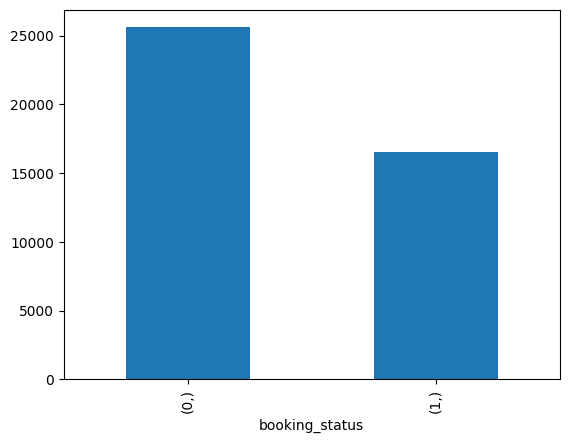

In [10]:
Y.value_counts().plot(kind='bar')

## Data Preprocessing and Data cleaning steps

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
num_pipe = make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy='mean')
).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


## Perform train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=42)

In [15]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
22719,0.151040,-0.313454,-0.998814,-0.979466,1.294624,-0.160945,-0.515173,0.371439,0.409661,-0.563215,-0.776617,0.428551,-0.173408,-0.060506,-0.101479,0.310555,-0.737691
13909,-1.753925,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,-0.701729,0.409661,-1.976961,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.876885,-0.737691
34013,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.047116,-2.441040,0.850531,-1.114133,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,-0.737691
25371,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-0.578376,0.409661,1.203968,-0.664112,-1.149928,-0.173408,-0.060506,-0.101479,-0.796106,-0.737691
33717,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,0.198745,0.409661,-0.209778,-0.214091,0.428551,-0.173408,-0.060506,-0.101479,0.625590,-0.737691


In [16]:
ytrain.head()

,booking_status
22719,1
13909,0
34013,0
25371,0
33717,1


## Build the Neural Network
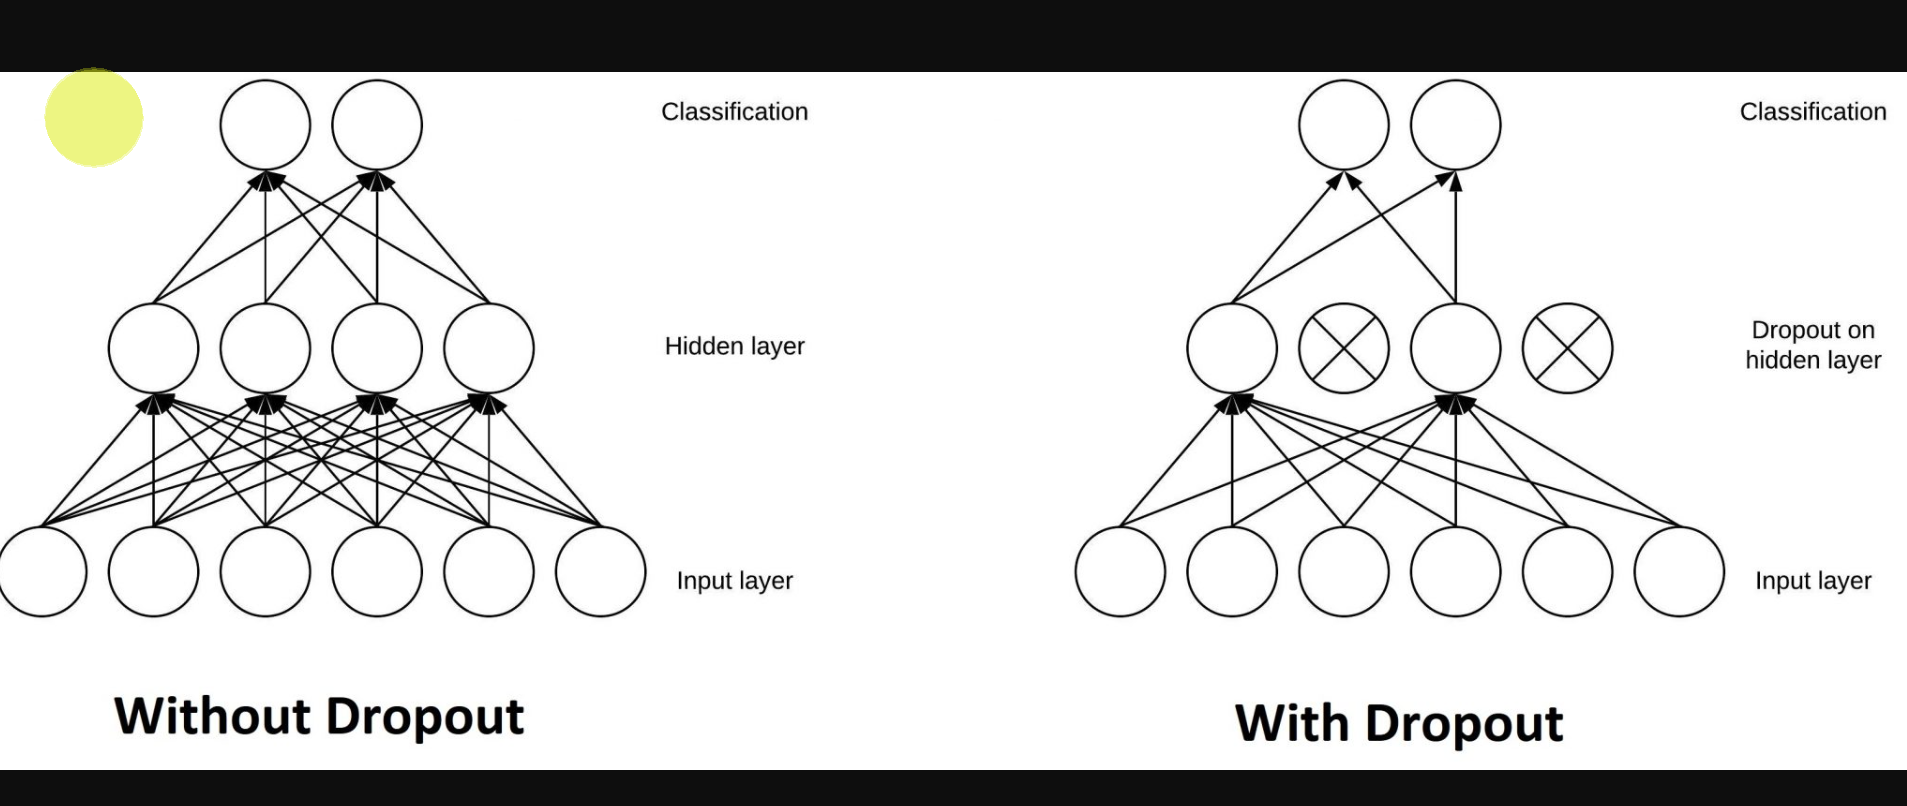

In [17]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout

In [18]:
xtrain.shape[1]

17

In [19]:
# Intialize the model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Dense layer - hidden layer
model.add(Dense(units=64,activation='relu'))

# Add the Dropout layer - this handles overfitting problem
model.add(Dropout(rate=0.4))

# Add another hidden layer
model.add(Dense(units=32,activation='relu'))

# Add the Dropout layer to 2nd hidden layer
model.add(Dropout(rate=0.25))

# Add Output layer
model.add(Dense(units=1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6868 - loss: 0.5755 - val_accuracy: 0.7661 - val_loss: 0.4839
Epoch 2/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7706 - loss: 0.4853 - val_accuracy: 0.7729 - val_loss: 0.4742
Epoch 3/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7771 - loss: 0.4747 - val_accuracy: 0.7785 - val_loss: 0.4711
Epoch 4/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7787 - loss: 0.4724 - val_accuracy: 0.7810 - val_loss: 0.4697
Epoch 5/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7850 - loss: 0.4650 - val_accuracy: 0.7799 - val_loss: 0.4664
Epoch 6/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7880 - loss: 0.4618 - val_accuracy: 0.7807 - val_loss: 0.4664
Epoch 7/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7837 - loss: 0.4664 - val_accuracy: 0.7845 - val_loss: 0.4635
Epoch 8/50
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7896 - loss: 0.4593 - val_accuracy: 0.

In [23]:
model.evaluate(xtrain,ytrain)

987/987 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8094 - loss: 0.4218


[0.42476749420166016, 0.8082660436630249]

In [24]:
model.evaluate(xtest,ytest)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8069 - loss: 0.4322


[0.43258026242256165, 0.805225670337677]

## Plot the learning curve

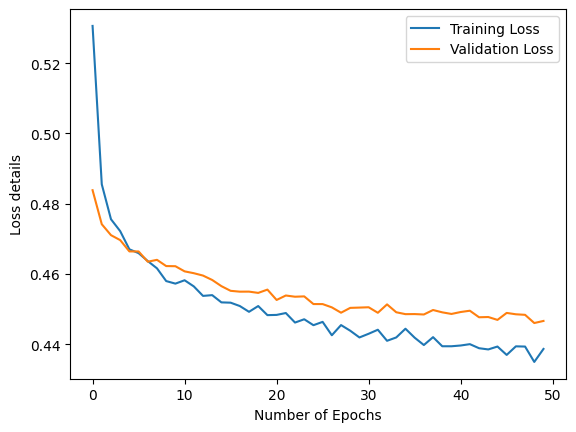

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss details")
plt.legend()
plt.show()

## Accuracy of the model is around 0.80. we can consider for final predictions

In [28]:
ypred_test = model.predict(xtest)
ypred_test[:5]

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.05294444],
       [0.86326015],
       [0.4516648 ],
       [0.01762792],
       [0.19673608]], dtype=float32)

In [29]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


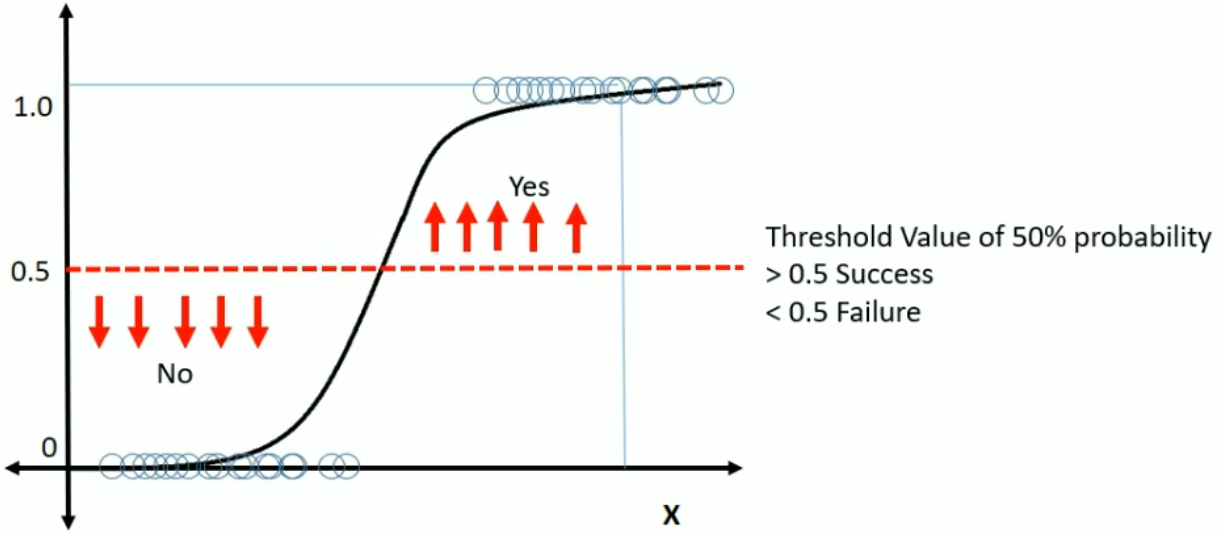

In [32]:
preds = []
for i in ypred_test:
  if i>0.5:
    preds.append(1)
  else:
    preds.append(0)
print(preds)

# preds = [1 if i>0.5 else 0 for i in ypred_test]

[0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 

In [33]:
preds[:5]

[0, 1, 0, 0, 0]

In [34]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


## Save the model

In [35]:
model.save("BookingStatusResults.keras")

In [36]:
# Loading the model

In [37]:
from keras.models import load_model

In [38]:
m = load_model('/content/BookingStatusResults.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

## Out of sample predictions

In [39]:
df_new = pd.read_csv('https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/booking_test.csv')
df_new.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [40]:
xnew = df_new.drop(columns=["id"])

In [42]:
xnew.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.6,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.0,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.0,1


In [43]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [44]:
preds_final = model.predict(xnew_pre)
preds_final[:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.08847082],
       [0.02709312],
       [0.38697892],
       [0.18124129],
       [0.6778457 ]], dtype=float32)

In [45]:
final_preds = [1 if i>0.5 else 0 for i in preds_final]
final_preds[:5]

[0, 0, 0, 0, 1]

In [46]:
df_new["Booking Status"] = final_preds
df_new

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking Status
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,0
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,0
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0,1
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1,0
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0,1


In [47]:
df_new.to_csv("Booking Results.csv",index=False)